In [34]:
import pandas as pd
import numpy as np
import datetime
# import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
epi_dir = '/Volumes/umms-esnitkin/Project_KPC_LTACH/Analysis/LTACH_transmission_modeling/data'

Facility Trace Formatting

In [5]:
# patient level info
df_pat = pd.read_csv(f"{epi_dir}/2019-12-18_patient_isolate_date_lookup_df.csv", index_col=0)
# facility trace
df_ftrace = pd.read_csv(f"{epi_dir}/2019-12-18_facility_trace.csv", index_col=0)
df_ftrace.columns = np.arange(367)

In [6]:
df_pat["patient.id"].nunique(), df_ftrace.shape[0]
# hannah's interpretation: 4 people who didn't get sequenced for whatever reason

(255, 260)

In [7]:
df_ftrace[(df_ftrace.max(1) < 1.5)].index
# only one person never got colonized!

Index([45], dtype='int64')

In [42]:
presence = (df_ftrace > 0).astype(int)
xs = []
ys = []
for row, series in presence.iterrows():
    for col, v in series.items():
        if v == 1:
            xs.append(row)
            ys.append(col)

<Axes: >

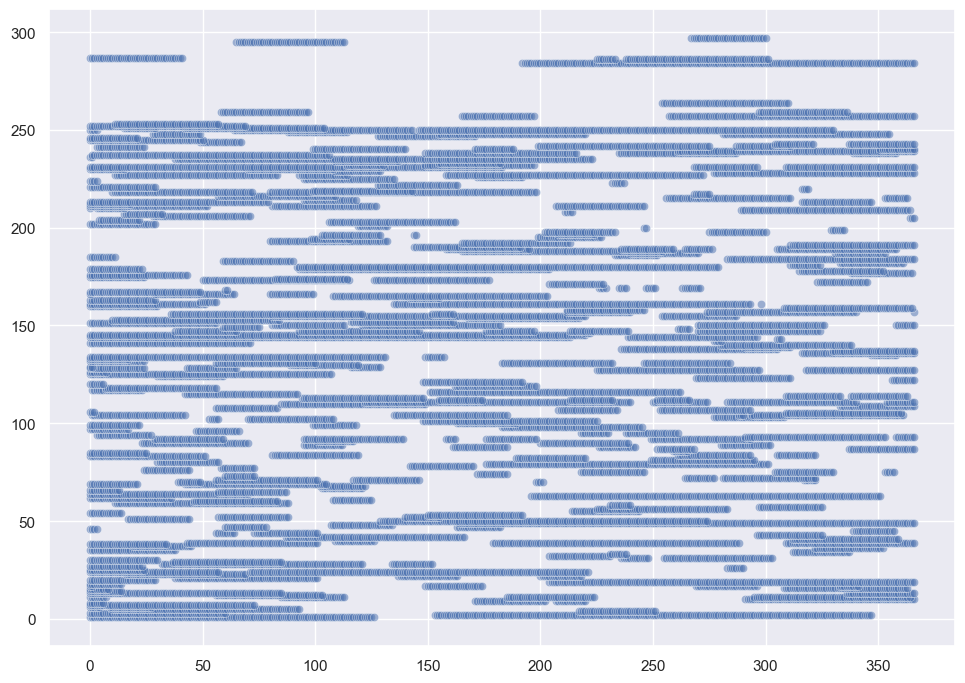

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(y = xs, x = ys, alpha=0.5)


Colonization on arrival

In [12]:
n = df_ftrace.shape[0]
intake_data = {"patient":[], "crkp":[], "date":[]}

In [ ]:
# loop through patients
for i in range(n):
    admitted = False
    for t in df_ftrace.columns:
        # what is the date they enter the facility?
        if df_ftrace.iloc[i, c] != 0:
            # if they have a positive test result upon intake, they count as infected
            # if they have a negative test or no test upon intake, they do not
            intake_data["crkp"][i] = int(df_ftrace.iloc[i, t] == 1.5)
            intake_data["date"][i] = t
            break
intake_data = pd.DataFrame(intake_data, index=df_ftrace.index)

In [71]:
admitted = False
statuses = {"patient": [], "crkp": [], "date": []}
for t, val in sample.items():
    if not admitted and (val > 0):
        admitted = True
        statuses["patient"].append(11)
        statuses["crkp"].append(int(val == 1.5))
        statuses["date"].append(t)
    if admitted and (val == 0):
        admitted = False


In [12]:
intake_data.to_csv("/Volumes/umms-esnitkin/Project_KPC_LTACH/Analysis/network/intake_data.csv")

15509 corresponds to June 18th, 2012..

Infections Formatting

In [17]:
# infections
df_inf = pd.read_excel(f"{epi_dir}/KPCLTACH_C_ClinicalMicro-2.xlsx")
# df_inf = df_inf[(df_inf["ORG"]=="Klebsiella pneumoniae") & (df_inf["Carbapenem_R"] == 1)]
df_inf = df_inf[(df_inf["ORG"]=="Klebsiella pneumoniae")]
df_inf = df_inf[["WGS_StudyID", "CollectDate", "Carbapenem_R"]]
df_inf = df_inf[df_inf["CollectDate"] > datetime.datetime(2012, 6, 18)]
df_inf = df_inf.set_index("WGS_StudyID").join(df_ftrace[0], how="inner")

In [18]:
df_inf.head()

,CollectDate,Carbapenem_R,0
1,2012-07-05,1,1.5
1,2012-07-17,1,1.5
1,2012-08-23,1,1.5
2,2013-03-15,0,0.0
3,2012-08-05,1,1.5


In [19]:
df_inf["test_time"] = df_inf["CollectDate"] - datetime.datetime(2012, 6, 18)
df_inf["test_time"] = df_inf["test_time"].dt.days
df_inf.drop(columns=[0], inplace=True)

In [26]:
df_inf_raw = pd.read_excel(f"{epi_dir}/KPCLTACH_C_ClinicalMicro-2.xlsx")

In [24]:
df_inf.to_csv("/Volumes/umms-esnitkin/Project_KPC_LTACH/Analysis/network/infections.csv")